# Overview

* This dataset contains review information on Google map (ratings, text, images, etc.), business metadata (address, geographical info, descriptions, category information, price, open hours, and MISC info), and links (relative businesses) up to Sep 2021 in the United States.
* The data is provided in JSON format, with one review or business metadata per line.
* We chose the dataset of Alabama.

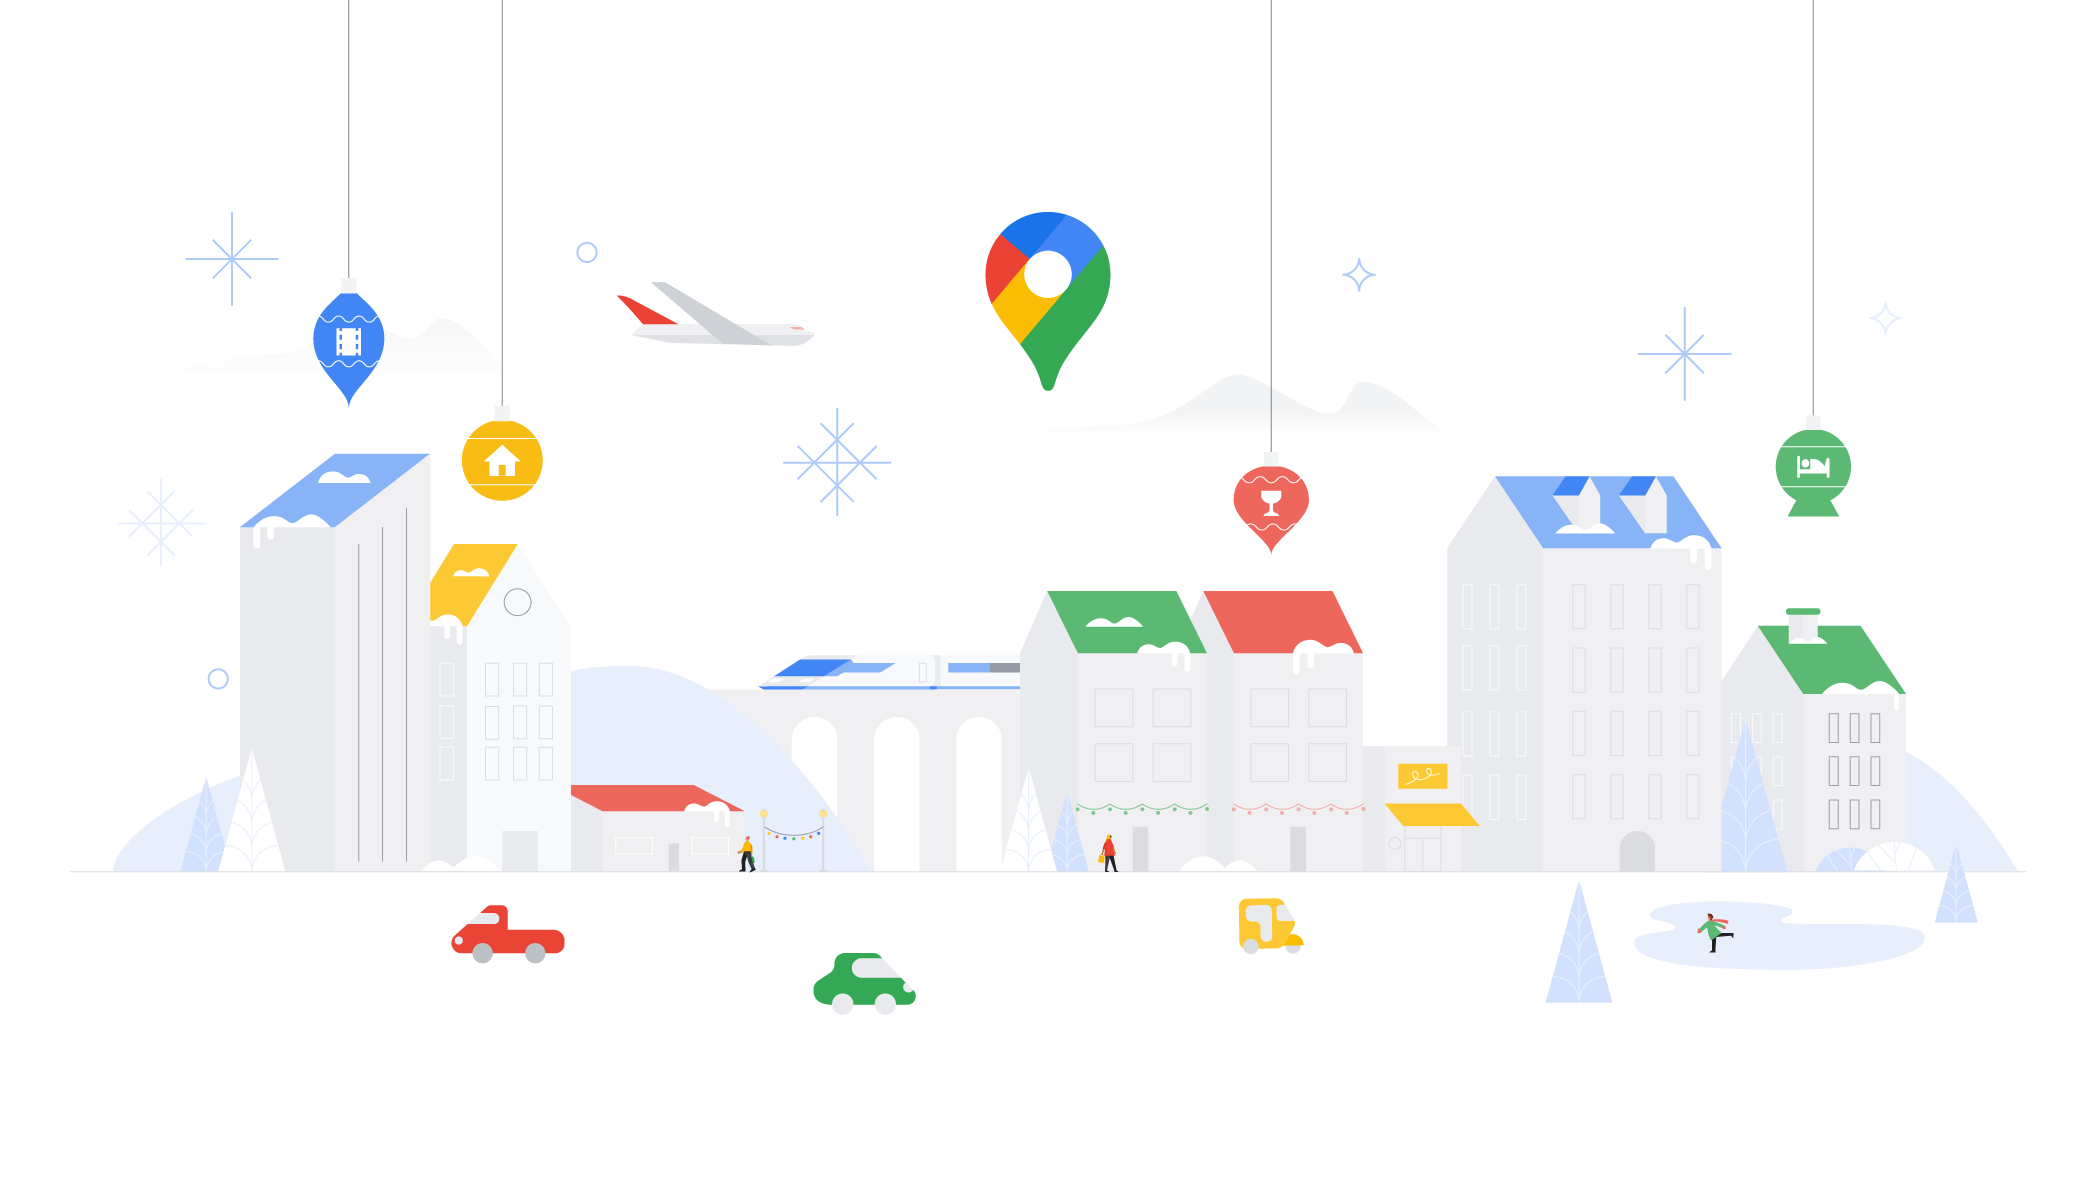

### Install some libraries

In [1]:
! pip install nltk
! pip install textblob
! pip install tensorflow-hub

### Import necessary libraries

In [2]:
# Importing necessary libraries
import urllib
import urllib.request

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import os
from pathlib import Path
import json
import gzip
import requests
from PIL import Image
import io

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Prepare the data

#### Review data

In [5]:
# Specifying the URL of the compressed JSON file to download
url1 = "https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/googlelocal/review-Alabama.json.gz"

# Specifying the desired filename for the downloaded file
filename1 = "review-Alabama.json.gz"

# Using the urlretrieve function from the urllib.request library to download the file from the URL and save it with the specified filename
urllib.request.urlretrieve(url1, filename1)

('review-Alabama.json.gz', <http.client.HTTPMessage at 0x7facfc6b8880>)

#### Meta data

In [6]:
# Specifying the URL of the compressed JSON file to download
url2 = "https://datarepo.eng.ucsd.edu/mcauley_group/gdrive/googlelocal/meta-Alabama.json.gz"

# Specifying the desired filename for the downloaded file
filename2 = "meta-Alabama.json.gz"

# Using the urlretrieve function from the urllib.request library to download the file from the URL and save it with the specified filename
urllib.request.urlretrieve(url2, filename2)

('meta-Alabama.json.gz', <http.client.HTTPMessage at 0x7fa845975e80>)

In [7]:
# Specify the path to the compressed JSON file containing reviews for Alabama
reviews_path = Path('review-Alabama.json.gz') 

# Specify the path to the compressed JSON file containing metadata for Alabama
metadata_path = Path('meta-Alabama.json.gz')

In [8]:
# Parse reviews 

# Create an empty list to store the parsed reviews
reviews = []
# Open the compressed JSON file containing reviews for Alabama
with gzip.open(reviews_path, 'rb') as f:
    for line in f:
        review = json.loads(line)
        # Extract the desired fields from the review and append them to the reviews list
        reviews.append({
        reviews.append({
            'user_id': review['user_id'],
            'text': review['text'], 
            'rating': review['rating'],
            'business_id': review['gmap_id'],
            'pics': review['pics']
        })
            

# Create a DataFrame from the parsed reviews
reviews_df = pd.DataFrame(reviews)

In [9]:
# Parse metadata

# Create an empty list to store the parsed metadata
metadata = [] 

# Open the compressed JSON file containing metadata for Alabama
with gzip.open(metadata_path, 'rb') as f:
    for line in f:
        biz = json.loads(line)
        # Extract the desired fields from the review and append them to the metadata list
        metadata.append({
            'business_id': biz['gmap_id'],
            'name': biz['name'],
            'categories': biz['category']
        })
        
# Create a DataFrame from the metadata reviews
metadata_df = pd.DataFrame(metadata)

In [10]:
# Convert the dataframe to a CSV file
reviews_df.to_csv('review-Alabama.csv', index=False)
metadata_df.to_csv('meta-Alabama.csv', index=False)

Now, We have two CSV files (review-Alabama.csv, meta-Alabama.csv)

In [4]:
# Read the CSV file containing review data for Alabama
review_data = pd.read_csv('review-Alabama.csv')
# Read the CSV file containing Meta data for Alabama
meta_data= pd.read_csv('meta-Alabama.csv')

If we check for nulls in the images column, we will find 98% of the missing values in that column and that's not logic, so I'm going to drop the nulls to deal with the existing image only

In [3]:
# Drop the Missing values in 'pics' column
review_data.dropna(subset=['pics'], inplace=True)

### Load & Explore Data

In [6]:
# Merge the review data and metadata dataframes
Final_df = pd.merge(review_data, meta_data, on='business_id')
# Save the combined dataframe to a CSV file
Final_df.to_csv('Final_df.csv', index=False)

In [14]:
# View the first 5 rows of the combined dataframe
Final_df.head()

,user_id,text,rating,business_id,pics,name,categories
0,109866307934069569973,Knowledgeable and friendly staff! A good selec...,5.0,0x88626b2e333be6d9:0x2a00a09a7045984f,[{'url': ['https://lh5.googleusercontent.com/p...,James Carpets of Huntsville,"['Flooring store', 'Carpet store', 'Rug store'..."
1,109866307934069569973,Knowledgeable and friendly staff! A good selec...,5.0,0x88626b2e333be6d9:0x2a00a09a7045984f,[{'url': ['https://lh5.googleusercontent.com/p...,James Carpets of Huntsville,"['Flooring store', 'Carpet store', 'Rug store'..."
2,109866307934069569973,Knowledgeable and friendly staff! A good selec...,5.0,0x88626b2e333be6d9:0x2a00a09a7045984f,[{'url': ['https://lh5.googleusercontent.com/p...,James Carpets of Huntsville,"['Flooring store', 'Carpet store', 'Rug store'..."
3,109866307934069569973,Knowledgeable and friendly staff! A good selec...,5.0,0x88626b2e333be6d9:0x2a00a09a7045984f,[{'url': ['https://lh5.googleusercontent.com/p...,James Carpets of Huntsville,"['Flooring store', 'Carpet store', 'Rug store'..."
4,102994040606677165301,VBS was awesome tonight at Piney Grove FWB. Ma...,5.0,0x8887b106ca264d17:0x81cc873794dfba6a,[{'url': ['https://lh5.googleusercontent.com/p...,Piney Grove Freewill Baptist,['Baptist church']


In [15]:
# Missing values percentage per-column
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169334 entries, 0 to 169333
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      169334 non-null  object 
 1   text         154545 non-null  object 
 2   rating       169334 non-null  float64
 3   business_id  169334 non-null  object 
 4   pics         169334 non-null  object 
 5   name         169334 non-null  object 
 6   categories   169285 non-null  object 
dtypes: float64(1), object(6)
memory usage: 9.0+ MB


### EDA

(array([  7991.,      0.,   3495.,      0.,      0.,   7125.,      0.,
         25492.,      0., 125231.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Count')

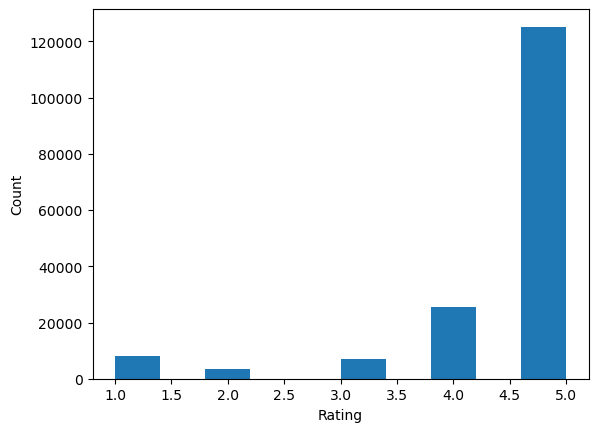

In [17]:
# Histogram of ratings
plt.hist(Final_df['rating'])  
plt.xlabel('Rating')  
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

<Axes: xlabel='count', ylabel='categories'>

Text(0.5, 1.0, 'Top 10 Categories with Most Reviews')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'Category')

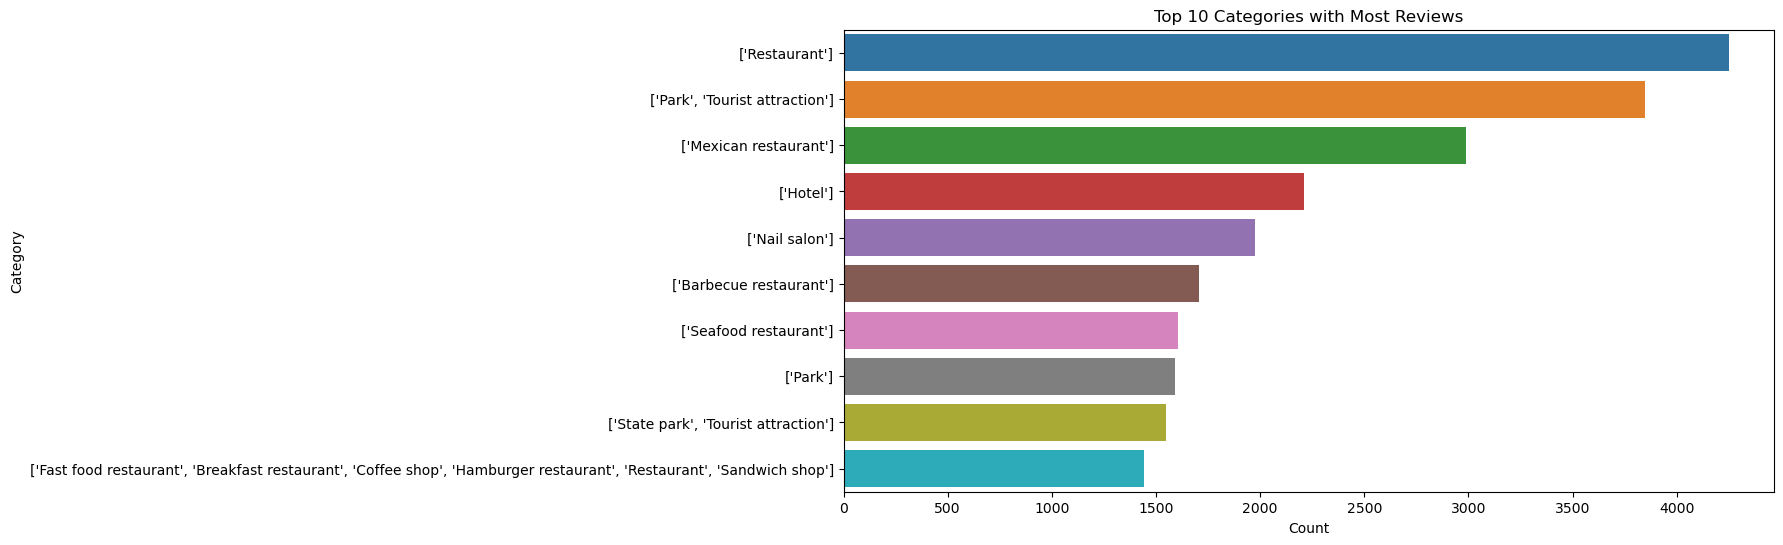

In [18]:
# Visualize the distribution of categories
# Plot a countplot of the categories
plt.figure(figsize=(12,6))
sns.countplot(data=Final_df, y="categories", order=Final_df.categories.value_counts().iloc[:10].index)

# Set the title and axis labels
plt.title("Top 10 Categories with Most Reviews")
plt.xlabel("Count")
plt.ylabel("Category")

# Show the plot
plt.show()

(array([1.51043e+05, 1.21130e+04, 3.11000e+03, 1.20800e+03, 6.20000e+02,
        3.68000e+02, 2.07000e+02, 1.68000e+02, 1.07000e+02, 3.90000e+02]),
 array([ 1. ,  5.9, 10.8, 15.7, 20.6, 25.5, 30.4, 35.3, 40.2, 45.1, 50. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Distribution of Images in Reviews')

Text(0.5, 0, 'Number of Images')

Text(0, 0.5, 'Count')

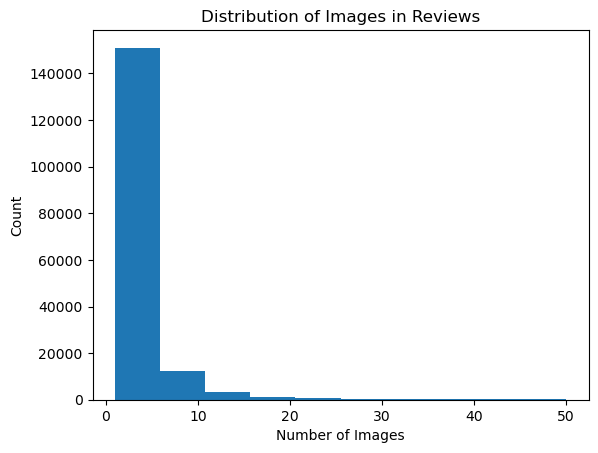

In [7]:
# Calculate the number of images in each review
num_images = Final_df["pics"].apply(lambda x: len(eval(x)))

# Plot a histogram of the number of images
plt.hist(num_images, bins=10)

# Set the title and axis labels
plt.title("Distribution of Images in Reviews")
plt.xlabel("Number of Images")
plt.ylabel("Count")

# Show the plot
plt.show()

In [8]:
# Summary of the descriptive statistics for all columns in the dataframe
Final_df.describe(include='all')

,user_id,text,rating,business_id,pics,name,categories
count,169334,154545,169334.000000,169334,169334,169334,169285
unique,86936,144474,NaN,30631,165044,22682,8003
top,107866715675056139487,Beautiful,NaN,0x889a4546cbb67455:0x2b8464983e59f46a,[{'url': ['https://lh5.googleusercontent.com/p...,McDonald's,['Restaurant']
freq,232,163,NaN,1408,8,1451,4252
mean,NaN,NaN,4.514622,NaN,NaN,NaN,NaN
std,NaN,NaN,1.011965,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


### Preprocessing

In [3]:
# Read the CSV file containing all of data for Alabama
Final_df = pd.read_csv('Final_df.csv')

#### Text cleaning

In [4]:
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define a function to clean the review text
def clean_text(text):
    # Check if the input is a string
    if isinstance(text, str):
        # Remove punctuations
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove special characters and digits
        text = re.sub('[^a-zA-Z]+', ' ', text)
        # Convert text to lowercase
        text = text.lower()
        # Remove stop words
        stop_words = set(stopwords.words('english'))
        words = text.split()
        words = [word for word in words if not word in stop_words]
        # Join the words back into a string
        text = ' '.join(words)
    return text

# Apply the clean_text function to the text column
Final_df['text'] = Final_df['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# Check the Null values
Final_df.isnull().sum()

user_id            0
text           14789
rating             0
business_id        0
pics               0
name               0
categories        49
dtype: int64

In [6]:
# Missing values percentage per-column
percent = (Final_df.isnull().sum()/Final_df.isnull().count()).sort_values(ascending=False)
percent

text           0.087336
categories     0.000289
user_id        0.000000
rating         0.000000
business_id    0.000000
pics           0.000000
name           0.000000
dtype: float64

In [7]:
# Fill missing values in the 'text' column of the DataFrame with 'no review'
Final_df['text'].fillna('no review', inplace=True)

In [8]:
# Fill missing values in the 'categories' column of the DataFrame with 'unknown'
Final_df['categories'].fillna('unknown', inplace=True)

In [9]:
# Display information about the DataFrame
Final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169334 entries, 0 to 169333
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      169334 non-null  object 
 1   text         169334 non-null  object 
 2   rating       169334 non-null  float64
 3   business_id  169334 non-null  object 
 4   pics         169334 non-null  object 
 5   name         169334 non-null  object 
 6   categories   169334 non-null  object 
dtypes: float64(1), object(6)
memory usage: 9.0+ MB


In [10]:
#Standardize the data
Final_df['rating'] = Final_df['rating'].astype(int)
Final_df['text'] = Final_df['text'].astype('category')
Final_df['name'] = Final_df['name'].astype('category')
Final_df['categories'] = Final_df['categories'].astype('category')

### Sentiment analysis

We create two new columns in the Final_df DataFrame: 'polarity' and 'subjectivity', which contain the sentiment analysis scores for each text in the 'text' column.

In [11]:
from textblob import TextBlob

# Define a function to calculate the polarity and subjectivity scores
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

# Apply the function to the 'text' column and create new columns for the scores
Final_df[['polarity', 'subjectivity']] = pd.DataFrame(Final_df['text'].tolist(), columns=['text']).apply(lambda x: pd.Series(get_sentiment(x['text'])), axis=1)

* The polarity score measures the sentiment of the text, ranging from -1 (negative) to 1 (positive).
* The subjectivity score measures the subjectivity of the text, ranging from 0 (objective) to 1 (subjective).

In [12]:
# Print the average sentiment scores
print("Average polarity:", Final_df["polarity"].mean())
print("Average subjectivity:", Final_df["subjectivity"].mean())

Average polarity: 0.37512582076483114
Average subjectivity: 0.5510878149742687


The reviews have a slightly positive polarity and are moderately subjective.


In [13]:
from textblob import TextBlob

# Define a function to get the sentiment label using TextBlob
def get_sentiment_label(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity

    if sentiment_score > 0:
        return 'positive'
    elif sentiment_score < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the get_sentiment_label function to the review text column
Final_df['sentiment'] = Final_df['text'].apply(get_sentiment_label)

Based in pervious code, we determined the sentiment label (positive, negative, or neutral)

### Check for duplicate rows

In [14]:
# Check for duplicate rows
duplicates = Final_df.duplicated()

# Print the number of duplicate rows
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  4258


In [15]:
# Remove duplicate rows
Final_df.drop_duplicates(inplace=True)

In [16]:
# Display the last 5 rows in data
Final_df.tail(5)

,user_id,text,rating,business_id,pics,name,categories,polarity,subjectivity,sentiment
169329,110830633753229994748,no review,3,0x888912c75384e095:0x3bf8b383c85ccf97,[{'url': ['https://lh5.googleusercontent.com/p...,The Outlet Shops of Grand River,"['Shopping mall', 'Outlet mall']",0.0,0.0,neutral
169330,108593753755099185400,no review,5,0x888912c75384e095:0x3bf8b383c85ccf97,[{'url': ['https://lh5.googleusercontent.com/p...,The Outlet Shops of Grand River,"['Shopping mall', 'Outlet mall']",0.0,0.0,neutral
169331,111454069442662752382,no review,5,0x888912c75384e095:0x3bf8b383c85ccf97,[{'url': ['https://lh5.googleusercontent.com/p...,The Outlet Shops of Grand River,"['Shopping mall', 'Outlet mall']",0.0,0.0,neutral
169332,102144129879256936144,no review,5,0x888912c75384e095:0x3bf8b383c85ccf97,[{'url': ['https://lh5.googleusercontent.com/p...,The Outlet Shops of Grand River,"['Shopping mall', 'Outlet mall']",0.0,0.0,neutral
169333,107778075400552850063,no review,5,0x888912c75384e095:0x3bf8b383c85ccf97,[{'url': ['https://lh5.googleusercontent.com/p...,The Outlet Shops of Grand River,"['Shopping mall', 'Outlet mall']",0.0,0.0,neutral


### Correlation analysis

([<matplotlib.axis.XTick at 0x7f55eb5ab1f0>,
 [Text(0, 0, 'rating'), Text(1, 0, 'polarity')])

([<matplotlib.axis.YTick at 0x7f55eb60edc0>,
 [Text(0, 0, 'rating'), Text(0, 1, 'polarity')])

Text(0.5, 1.0, 'Correlation Matrix')

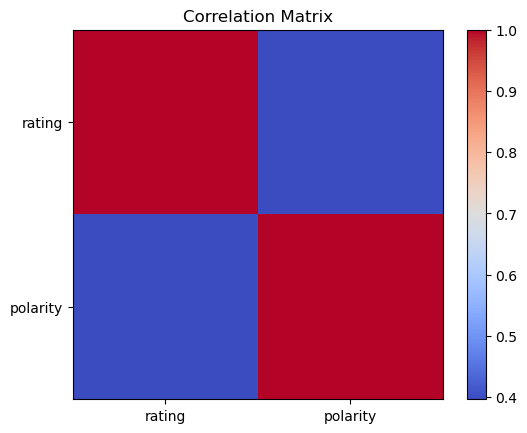

In [16]:
# Calculate the correlation matrix
corr_matrix = Final_df[["rating", "polarity"]].corr()

# Plot the correlation matrix
plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(2), ["rating", "polarity"])
plt.yticks(range(2), ["rating", "polarity"])
plt.title("Correlation Matrix")
plt.show()

### Download image from our data

In [18]:
'''
# Create a new directory to store the downloaded images
if not os.path.exists('images'):
    os.makedirs('images')

# Loop through the "pics" column and download each image
for i, row in Final_df.iterrows():
    # Get the URL of the image
    pics_data = json.loads(row['pics'].replace("'", '"'))
    url = pics_data[0]['url'][0]

    # Send a GET request to the URL and receive the response
    response = requests.get(url)

    # Check that the request was successful
    if response.status_code == 200:
        # Save the image to a file
        filename = f"image_{i}.jpg"
        with open(f"images/{filename}", 'wb') as f:
            f.write(response.content)
        print(f"Image {filename} downloaded successfully.")
    else:
        print(f"Failed to download image {i}.")'''

'import requests\nimport os\nimport json\n\n# Create a new directory to store the downloaded images\nif not os.path.exists(\'images\'):\n    os.makedirs(\'images\')\n\n# Loop through the "pics" column and download each image\nfor i, row in Final_df.iterrows():\n    # Get the URL of the image\n    pics_data = json.loads(row[\'pics\'].replace("\'", \'"\'))\n    url = pics_data[0][\'url\'][0]\n\n    # Send a GET request to the URL and receive the response\n    response = requests.get(url)\n\n    # Check that the request was successful\n    if response.status_code == 200:\n        # Save the image to a file\n        filename = f"image_{i}.jpg"\n        with open(f"images/{filename}", \'wb\') as f:\n            f.write(response.content)\n        print(f"Image {filename} downloaded successfully.")\n    else:\n        print(f"Failed to download image {i}.")'

### Visualize Some of Images

(-0.5, 149.5, 149.5, -0.5)

(-0.5, 149.5, 149.5, -0.5)

(-0.5, 149.5, 149.5, -0.5)

(-0.5, 149.5, 149.5, -0.5)

(-0.5, 149.5, 149.5, -0.5)

(-0.5, 149.5, 149.5, -0.5)

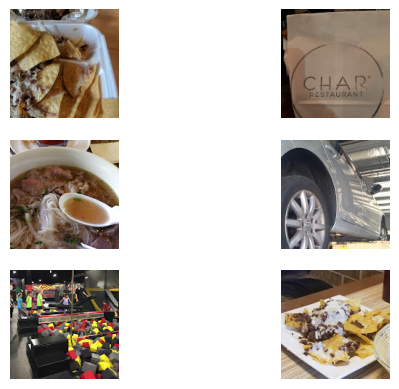

In [20]:
import matplotlib.image as mpimg

# Get the list of image files
path = 'images'
files = os.listdir(path)[:6]  # Display only the first 6 images

# Set up the figure with a grid of 3 rows and 2 columns
fig, axs = plt.subplots(3, 2)

# Loop over the image files and display each one
for i, file in enumerate(files):
    row = i // 2
    col = i % 2
    img = mpimg.imread(os.path.join(path, file))
    axs[row, col].imshow(img)
    axs[row, col].axis('off')

# Show the plot
plt.show()

### Spilt data to train, validation and test sets

In [17]:
#Store the sentiment labels in a variable
labels = Final_df['sentiment'].values
#Print the sentiment labels
labels

array(['positive', 'positive', 'positive', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [18]:
#Define the directory containing the images
image_dir = 'images'
#Get a list of all file names in the image directory
image_names = [fname for fname in os.listdir(image_dir)]

* #### I take 300 rows only to perform to reduce resource usage and prevent RAM crashes when working with a large dataset.
* #### To get better accuracy, we should increase the number of images to 5000 at least 


In [19]:
#Define a dataframe with 300 image names and labels (sample of the data)
data = pd.DataFrame({'image':image_names[:300], 'label': labels[:300]})

In [20]:
#Split into 80% train and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(data['image'],data['label'], test_size=0.2, random_state=42)
#Of the 80% train data, split into 75% train and 25% validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [21]:
#Create a dictionary of the train, validation and test splits
data_splits = {
    'train': {'x':X_train, 'y':y_train},
    'val': {'x':X_val, 'y':y_val},
    'test': {'x':X_test, 'y':y_test}
}

In [22]:
#Save the x (images) and y (labels) for each split to CSV
for split, data in data_splits.items():
    data['x'].to_csv(f'{split}_images.csv', index=False)  
    data['y'].to_csv(f'{split}_labels.csv', index=False)

In [23]:
import torch
from torchvision import transforms
from PIL import Image

img_path='images/'

# Define a transform to convert the images to PyTorch tensors
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224*224
    transforms.ToTensor(),  # Convert to PyTorch tensor
])

# Prepare data
train_images = []
train_labels = []

# Load train image files  
for img in X_train:  
    img = Image.open(img_path + img)
    img = transform(img)
    train_images.append(img)

# Convert to PyTorch tensor
train_images = torch.stack(train_images)

# Convert labels to tensor
label_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}  # Define your own mapping based on your labels
train_labels = [label_mapping[label] for label in y_train]
train_labels = torch.tensor(train_labels)


In [25]:
# Prepare validation data
val_images = []
val_labels = []

# Load validation image files  
for img in X_val:  
    img = Image.open(img_path + img)
    img = transform(img)
    val_images.append(img)

# Convert to PyTorch tensor
val_images = torch.stack(val_images)

# Convert labels to tensor
val_labels = [label_mapping[label] for label in y_val]
val_labels = torch.tensor(val_labels)

In [26]:
# Prepare test data
test_images = []
test_labels = []

# Load test image files  
for img in X_test:  
    img = Image.open(img_path + img)
    img = transform(img)
    test_images.append(img)

# Convert to PyTorch tensor
test_images = torch.stack(test_images)

# Convert labels to tensor
test_labels = [label_mapping[label] for label in y_test]
test_labels = torch.tensor(test_labels)

In [27]:
# Convert labels to LongTensor
train_labels = train_labels.long()
# Reshape labels to match output dimensions
# Assume train_labels is your original labels tensor
train_labels = train_labels.view(-1, 1, 1, 1)  # Reshape to (batch_size, 1, 1, 1)

In [28]:
# Convert labels to LongTensor
val_labels = val_labels.long()
# Reshape labels to match output dimensions
# Assume train_labels is your original labels tensor
val_labels = val_labels.view(-1, 1, 1, 1)  # Reshape to (batch_size, 1, 1, 1)

In [29]:
# Convert labels to LongTensor
test_labels = test_labels.long()
# Reshape labels to match output dimensions
# Assume train_labels is your original labels tensor
test_labels = test_labels.view(-1, 1, 1, 1)  # Reshape to (batch_size, 1, 1, 1)

## Item-Oriented CNN

* The ItemOrientedCNN is a deep learning model for visual sentiment analysis of review images.
* It consists of two types of convolutional layers:
    1. shared filters.
    2. item-specific filters.
* The model takes as input an RGB image with size (3, 224, 224) and an item ID, and outputs a sentiment score for the image, which belongs to one of three sentiment classes.

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim

In [31]:
class ItemOrientedCNN(nn.Module):
    
    def __init__(self, num_items, num_filters=48, k=8, batch_size=32): 
        super(ItemOrientedCNN, self).__init__()
        
        self.input_size = (3, 224, 224) 
        self.output_size = (batch_size, 3) # 3 sentiment classes
        self.num_filters = num_filters
        self.k = k
            
        self.shared_filters = nn.Sequential(
            nn.Conv2d(3, num_filters - k//2, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(num_filters - k//2),      
            nn.Dropout(0.5)
        )
            
        self.item_specific_filters = nn.ModuleList([
            nn.Sequential(        
                nn.Conv2d(3, k//2, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),            
                nn.BatchNorm2d(k//2),
                nn.Dropout(0.5)
            ) for _ in range(num_items)
        ])       
            
        # Calculate actual conv output size         
        conv_out = self.calculate_conv_output(self.input_size, self.num_filters, self.k)
        
        self.fc = nn.Linear(2408448, 3)     
        #self.fc = nn.Linear(conv_out, 3)  
            
    def calculate_conv_output(self, input_size,  num_filters,k):
        #in_h, in_w = self.input_size[2:]
        in_h = self.input_size[2]
        in_w = self.input_size[2] 
        out_h = ((in_h - 3) + 2*1) // 1 + 1
        out_w = ((in_w - 3) + 2*1) // 1 + 1
        out = (num_filters - k//2) * out_h * out_w 
        return out
        
    def forward(self, x, item_id):
        shared_out = self.shared_filters(x)
        item_specific_out = self.item_specific_filters[item_id](x)
        out = torch.cat((shared_out, item_specific_out), dim=1)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [32]:
# Assume we have 10 items and an image of size (1, 3, 64, 64)
num_items = len(train_images)  # Set num_items to the number of images

batch_size = 32 

model = ItemOrientedCNN(num_items, batch_size=batch_size)

# Assume item_id is the index of the image in the batch
for i, img in enumerate(train_images):
    img = img.unsqueeze(0)  # Add an extra dimension for the batch size
    item_id = i  # Use the index as the item_id

    # Pass the image and item_id to the model
    out = model(img, item_id)

    # Print the output
    print(out.shape)


torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([

### Train Item-Oriented CNN model

In [33]:
# Define the optimizer and criterion outside the loop
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=-1)

# Define early stopping parameters
patience = 3  # How many epochs with no improvement before we stop
epochs_no_improve = 0
min_val_loss = np.Inf  # Initialize minimum validation loss as infinity

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    for i, img in enumerate(train_images):
        # Add an extra dimension for the batch size
        img = img.unsqueeze(0)
        item_id = i  # Use the index as the item_id

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(img, item_id)
        outputs = outputs.view(outputs.size(0), -1)
        _, predicted = torch.max(outputs.data, 1)
        total += train_labels[i:i+1].size(0)
        correct += (predicted == train_labels[i:i+1]).sum().item()

        # Compute loss
        loss = criterion(outputs, train_labels[i:i+1].view(-1))


        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    # Print accuracy after each epoch
    print('Accuracy of the network on the train images: %d %%' % (100 * correct / total))
    
    # Validation loss
    val_loss = 0.0
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for i, (val_img, val_label) in enumerate(zip(val_images, val_labels)):
            val_img = val_img.unsqueeze(0)
            item_id = i  # Use the index as the item_id
            val_outputs = model(val_img, item_id)
            val_outputs = val_outputs.view(1, -1)  # Reshape to match the labels
            v_loss = criterion(val_outputs, val_label.view(-1))
            val_loss += v_loss.item()

    # Check if validation loss has improved
    if val_loss < min_val_loss:
        epochs_no_improve = 0
        min_val_loss = val_loss
    else:
        epochs_no_improve += 1
        # Check early stopping condition
        if epochs_no_improve == patience:
            print('Early stopping!')
            break
            
print('Training')


Accuracy of the network on the train images: 67 %


ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.5, inplace=False)
    )
  )
  (fc): Linear(in_features=2408448, out_features=3, bias=True)
)

Accuracy of the network on the train images: 77 %


ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.5, inplace=False)
    )
  )
  (fc): Linear(in_features=2408448, out_features=3, bias=True)
)

Accuracy of the network on the train images: 80 %


ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.5, inplace=False)
    )
  )
  (fc): Linear(in_features=2408448, out_features=3, bias=True)
)

Early stopping!
Training


The model achieved an accuracy of 67% on the training set in the first epoch, which increased to 77% in the second epoch and to 80% in the third epoch. The model stopped training early after the third epoch due to no improvement in the validation loss for three consecutive epochs. 

### test Item-Oriented CNN mode

In [34]:
# Set the model to evaluation mode
model.eval()

# Initialize the test loss and accuracy
test_loss = 0.0
correct = 0
total = 0
            
with torch.no_grad():
    for i, img in enumerate(test_images):
        print(f"Input size: {img.size()}, Target size: {test_labels[i].size()}")
        img = img.unsqueeze(0)
        item_id = i
        # Forward pass
        outputs = model(img, item_id)
        outputs = outputs.view(outputs.size(0), -1)
        # Calculate loss
        t_loss = criterion(outputs, test_labels[i].view(-1))
        test_loss += t_loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(out.data, 1)
        total += test_labels[i].size(0)
        correct += (predicted == test_labels[i].view(-1)).sum().item()
        
# Print test loss and accuracy
print('Test Loss: {:.6f}\n'.format(test_loss))
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))



ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 44, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(44, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(3, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
      (2): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): Dropout(p=0.5, inplace=False)
    )
  )
  (fc): Linear(in_features=2408448, out_features=3, bias=True)
)

Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]),

The achieved accuracy of 83% on the test images suggests that the neural network is performing quite well in accurately predicting the labels for the test data.

### Pre-train this model with ALexNet Model

* AlexNet is a deep convolutional neural network (CNN) that was developed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton in 2012.
* AlexNet was designed to compete in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) and achieved state-of-the-art performance on the challenge, surpassing the previous best-performing model by a large margin.
* AlexNet consists of eight layers, including five convolutional layers and three fully connected layers.
* AlexNet was trained on a large dataset of more than one million images from 1,000 different object categories, and it was able to achieve a top-5 error rate of 15.3% on the ImageNet dataset, which was a significant improvement over the previous best-performing model.
* In the ItemOrientedCNN model, the alexnet variable is used to load the pretrained AlexNet model, and the features portion of the model (all layers up to the fully connected layers) is used as the shared convolutional filters in the ItemOrientedCNN model. This allows the model to leverage the pretrained weights of the AlexNet model, which have been learned from a large dataset of images, to improve its performance on the visual sentiment analysis task.

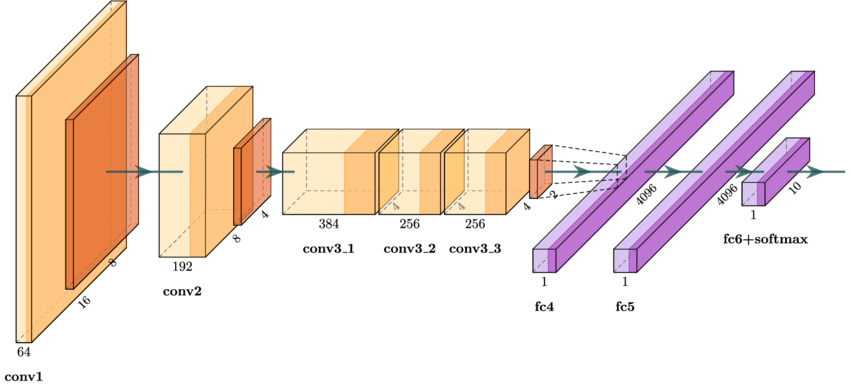

In [35]:
import torch.nn as nn
import torchvision.models as models

# Load AlexNet pre-trained model
alexnet = models.alexnet(pretrained=True)

/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [36]:
# Get the list of child modules from the AlexNet model, excluding the last layer
alexnet_features = list(alexnet.children())[:-1]

In [37]:
class ItemOrientedCNN(nn.Module):
    def __init__(self, num_items, num_filters=48, k=8, batch_size=32): 
        super(ItemOrientedCNN, self).__init__()
        
        self.input_size = (3, 224, 224) 
        self.output_size = (batch_size, 3) # 3 sentiment classes
        self.num_filters = num_filters
        self.k = k
            
        # Load the pretrained model
        alexnet = models.alexnet(pretrained=True)

        # Use the features from AlexNet (all layers up to the fully connected layers)
        self.shared_filters = alexnet.features

        self.item_specific_filters = nn.ModuleList([
            nn.Sequential(        
                nn.Conv2d(256, k//2, kernel_size=3, stride=1, padding=1),  # Adjust the input size to match the output size of shared_filters
                nn.ReLU(),            
                nn.BatchNorm2d(k//2),
                nn.Dropout(0.5)
            ) for _ in range(num_items)
        ])       
            
        # Calculate actual conv output size         
        conv_out = self.calculate_conv_output(self.input_size, self.num_filters, self.k)
        
        #self.fc = nn.Linear(conv_out + k//2, 3)  # Adjust the input size to match the concatenated output size
        self.fc = nn.Linear(9360, 3)
            
    def calculate_conv_output(self, input_size,  num_filters,k):
        #in_h, in_w = self.input_size[2:]
        in_h = self.input_size[2]
        in_w = self.input_size[2] 
        out_h = ((in_h - 3) + 2*1) // 1 + 1
        out_w = ((in_w - 3) + 2*1) // 1 + 1
        out = (num_filters - k//2) * out_h * out_w 
        return out
        
    def forward(self, x, item_id):
        shared_out = self.shared_filters(x)
        item_specific_out = self.item_specific_filters[item_id](shared_out)  # Pass the output of shared_filters to item_specific_filters
        out = torch.cat((shared_out, item_specific_out), dim=1)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out


In [38]:
# Assume we have 10 items and an image of size (1, 3, 64, 64)
num_items = len(train_images)  # Set num_items to the number of images

batch_size = 32 

model = ItemOrientedCNN(num_items, batch_size=batch_size)

# Assume item_id is the index of the image in the batch
for i, img in enumerate(train_images):
    img = img.unsqueeze(0)  # Add an extra dimension for the batch size
    item_id = i  # Use the index as the item_id

    # Pass the image and item_id to the model
    out = model(img, item_id)

    # Print the output
    print(out.shape)


torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([1, 3])
torch.Size([

In [39]:
# Define the optimizer and criterion outside the loop
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=-1)

# Define early stopping parameters
patience = 3  
epochs_no_improve = 0
min_val_loss = np.Inf  # Initialize minimum validation loss as infinity

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    for i, img in enumerate(train_images):
        # Add an extra dimension for the batch size
        img = img.unsqueeze(0)
        item_id = i  # Use the index as the item_id

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(img, item_id)
        outputs = outputs.view(outputs.size(0), -1)
        _, predicted = torch.max(outputs.data, 1)
        total += train_labels[i:i+1].size(0)
        correct += (predicted == train_labels[i:i+1]).sum().item()

        # Compute loss
        loss = criterion(outputs, train_labels[i:i+1].view(-1))


        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
            
    # Print accuracy after each epoch
    print('Accuracy of the network on the train images: %d %%' % (100 * correct / total))
    
    # Validation loss
    val_loss = 0.0
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for i, (val_img, val_label) in enumerate(zip(val_images, val_labels)):
            val_img = val_img.unsqueeze(0)
            item_id = i  # Use the index as the item_id
            val_outputs = model(val_img, item_id)
            val_outputs = val_outputs.view(1, -1)  # Reshape to match the labels
            v_loss = criterion(val_outputs, val_label.view(-1))
            val_loss += v_loss.item()

    # Check if validation loss has improved
    if val_loss < min_val_loss:
        epochs_no_improve = 0
        min_val_loss = val_loss
    else:
        epochs_no_improve += 1
        # Check early stopping condition
        if epochs_no_improve == patience:
            print('Early stopping!')
            break
            
print('Training')


Accuracy of the network on the train images: 76 %


ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(256, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    

Accuracy of the network on the train images: 80 %


ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(256, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    

Accuracy of the network on the train images: 80 %


ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(256, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    

Early stopping!
Training


* Pre-training the model with AlexNet has improved its performance. 
* The accuracy has increased from 76% to 80% and then remained stable at 80%.

In [40]:
# Set the model to evaluation mode
model.eval()

# Initialize the test loss and accuracy
test_loss = 0.0
correct = 0
total = 0
            
# No need to track gradients in test mode
with torch.no_grad():
    for i, img in enumerate(test_images):
        print(f"Input size: {img.size()}, Target size: {test_labels[i].size()}")
        img = img.unsqueeze(0)
        item_id = i
        # Forward pass
        outputs = model(img, item_id)
        outputs = outputs.view(outputs.size(0), -1)
        # Calculate loss
        t_loss = criterion(outputs, test_labels[i].view(-1))
        test_loss += t_loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(out.data, 1)
        total += test_labels[i].size(0)
        correct += (predicted == test_labels[i].view(-1)).sum().item()
        
# Print test loss and accuracy
print('Test Loss: {:.6f}\n'.format(test_loss))
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))



ItemOrientedCNN(
  (shared_filters): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (item_specific_filters): ModuleList(
    (0-179): 180 x Sequential(
      (0): Conv2d(256, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU()
    

Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]), Target size: torch.Size([1, 1, 1])
Input size: torch.Size([3, 224, 224]),

* The accuracy = 10% on the test set, it seems that the model is not performing well.
* The model has to overfit to the training data and is not generalizing well to new data.
* To get better accuracy, we should augment the data.
* The number of photos must be increased to at least 5,000 photos.
* Unfortunately, the resources do not help me to work on a large number of images.

### The user-oriented CNN Model

* The UserOrientedCNN is a deep learning model for visual sentiment analysis of review images.
* It is similar to the ItemOrientedCNN model, but it is designed to be user-specific instead of item-specific.
* The model takes as input an RGB image with size (3, 224, 224) and a user ID, and outputs a sentiment score for the image, which belongs to one of three sentiment classes.

In [61]:
class UserOrientedCNN(nn.Module):
    def __init__(self, num_users):
        super(UserOrientedCNN, self).__init__()
        
        # First 3 conv layers are shared 
        self.shared_conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1) 
        self.shared_conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.shared_conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        # Final conv layer is user-specific
        self.user_specific_convs = nn.ModuleList([
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=False)
            for _ in range(num_users)  
        ])
        
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64*224*224, 3)  # Assuming the flattened tensor has 64 features and there are 'num_classes' classes  
        
    def forward(self, x, user_id):  
        x = self.shared_conv1(x)
        x = self.relu(x)  
        x = self.shared_conv2(x)
        x = self.relu(x)
        x = self.shared_conv3(x)
        x = self.relu(x) 
        
        x = self.user_specific_convs[user_id](x)
        
        x = self.relu(x) 
        x = self.maxpool(x)  
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [62]:
# Assume we have 10 items and an image of size (1, 3, 64, 64)
num_users = len(train_images)  # Set num_users to the number of images
# Instantiate the model
model = UserOrientedCNN(num_users)

In [67]:
# Assuming your model is named 'model'
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss(ignore_index=-1)
# Define early stopping parameters
patience = 5  # Number of epochs to wait for improvement before stopping
best_val_loss = float('inf')  # Initialize best validation loss
epochs_no_improve = 0  # Counter to keep track of number of epochs without improvement

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    for i, img in enumerate(train_images):
        # Add an extra dimension to the image tensor and send it to the device
        img = img.unsqueeze(0)
        user_id = i
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(img,user_id)
        outputs = outputs.view(outputs.size(0), -1)
        _, predicted = torch.max(outputs.data, 1)
        total += train_labels[i:i+1].size(0)
        correct += (predicted == train_labels[i:i+1]).sum().item()
        
        # Compute loss
        loss = criterion(outputs, train_labels[i:i+1].view(-1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_images)}, Accuracy: {correct / total * 100}%')
    # Calculate validation loss
    val_loss = 0.0
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for i, (val_img, val_label) in enumerate(zip(val_images, val_labels)):
            val_img = val_img.unsqueeze(0)
            user_id = i  # Use the index as the item_id
            val_outputs = model(val_img, user_id)
            val_outputs = val_outputs.view(1, -1)  # Reshape to match the labels
            v_loss = criterion(val_outputs, val_label.view(-1))
            val_loss += v_loss.item()

    # Check if validation loss has improved
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if it's time to stop
    if epochs_no_improve == patience:
        print('Early stopping!')
        break


Epoch 1, Loss: 0.06391329744264011, Accuracy: 100.0%


UserOrientedCNN(
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Epoch 2, Loss: 0.0023396930482704192, Accuracy: 100.0%


UserOrientedCNN(
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Epoch 3, Loss: 0.0011836361534379748, Accuracy: 100.0%


UserOrientedCNN(
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Epoch 4, Loss: 0.0007741588609279561, Accuracy: 100.0%


UserOrientedCNN(
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Epoch 5, Loss: 0.000567790250108323, Accuracy: 100.0%


UserOrientedCNN(
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Early stopping!


The UserOrientedCNN model has achieved perfect accuracy of 100% on the training set after the first epoch and maintained this accuracy for subsequent epochs.

In [68]:
# Set the model to evaluation mode
model.eval()

# Assuming you have a testloader
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():  # Turn off gradients for testing
    for i, img in enumerate(test_images):
        img = img.unsqueeze(0)
        user_id = i
        outputs = model(img, user_id)
        outputs = outputs.view(1, -1, 1, 1)
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += test_labels[i:i+1].size(0)
        correct += (predicted == test_labels[i:i+1]).sum().item()

# Print test loss and accuracy
print('Test Loss: {:.6f}\n'.format(test_loss))
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

UserOrientedCNN(
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Test Loss: 0.000000

Accuracy of the network on the test images: 10 %


* The accuracy = 10% on the test set, it seems that the model is not performing well.
* The model has to overfit to the training data and is not generalizing well to new data.
* To get better accuracy, we should augment the data.
* The number of photos must be increased to at least 5,000 photos.
* Unfortunately, the resources do not help me to work on a large number of images.

### Pre-train user-oriented CNN Model with he weights from Inception ResNet v1

* Inception ResNet v1 is a deep convolutional neural network (CNN) architecture that was jointly developed by researchers at Google and the University of Amsterdam.
* It was proposed as an extension to the Inception architecture, which was designed to improve the efficiency and accuracy of CNNs by using a combination of convolutional layers with different filter sizes and pooling.
* The Inception ResNet v1 architecture incorporates batch normalization and ReLU activation functions to improve the performance of the network.
* The Inception ResNet v1 architecture was trained on the ImageNet dataset, which consists of more than one million images from 1,000 different object categories. It achieved a top-1 error rate of 20.2% and a top-5 error rate of 5.6% on the ImageNet validation set, which was a significant improvement over the previous state-of-the-art models.
* In the UserOrientedCNN model, the inception_resnet_v1 variable is used to load the pretrained Inception ResNet v1 model, and the conv2d_1a layer of the model is used as the shared convolutional filters in the UserOrientedCNN model. This allows the model to leverage the pretrained weights of the Inception ResNet v1 model, which have been learned from a large dataset of images, to improve its performance on the visual sentiment analysis task.

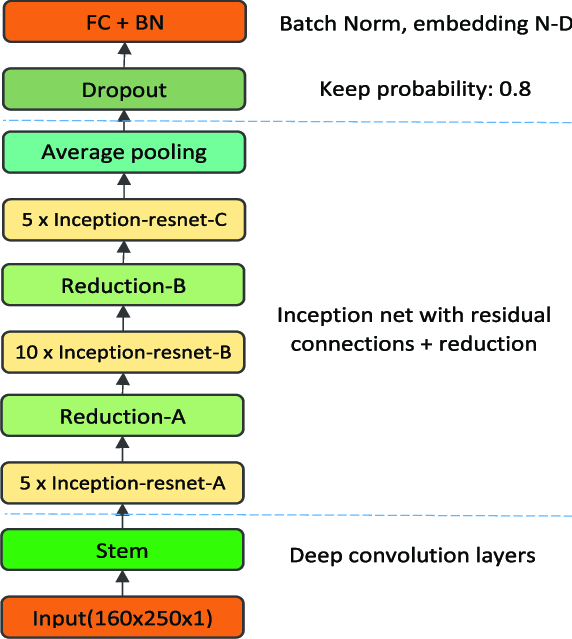

In [69]:
!pip install facenet-pytorch


In [70]:
from facenet_pytorch import InceptionResnetV1

In [71]:
class UserOrientedCNN(nn.Module):
    def __init__(self, num_users):
        super(UserOrientedCNN, self).__init__()
        
        # Load the pretrained model
        inception_resnet_v1 = InceptionResnetV1(pretrained='vggface2')
        
        # Use the features from InceptionResnetV1 (all layers up to the fully connected layers)
        self.shared_filters = inception_resnet_v1.conv2d_1a
        
        # First 3 conv layers are shared 
        self.shared_conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1) 
        self.shared_conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.shared_conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        # Final conv layer is user-specific
        self.user_specific_convs = nn.ModuleList([
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1, bias=False)
            for _ in range(num_users)  
        ])
        
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(64*224*224, 3)  # Assuming the flattened tensor has 64 features and there are 'num_classes' classes  
        
    def forward(self, x, user_id):  
        x = self.shared_conv1(x)
        x = self.relu(x)  
        x = self.shared_conv2(x)
        x = self.relu(x)
        x = self.shared_conv3(x)
        x = self.relu(x) 
        
        x = self.user_specific_convs[user_id](x)
        
        x = self.relu(x) 
        x = self.maxpool(x)  
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [72]:
# Assume we have 10 items and an image of size (1, 3, 64, 64)
num_users = len(train_images)  # Set num_users to the number of images
# Instantiate the model
model = UserOrientedCNN(num_users)

In [82]:
# Assuming your model is named 'model'
optimizer = optim.SGD(model.parameters(), lr=0.001)  # Use Stochastic Gradient Descent as the optimizer
criterion = nn.CrossEntropyLoss(ignore_index=-1)  

# Define early stopping parameters
patience = 3  # Number of epochs to wait for improvement before stopping
best_val_loss = float('inf')  # Initialize best validation loss
epochs_no_improve = 0  # Counter to keep track of number of epochs without improvement

for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    correct = 0
    total = 0
    for i, img in enumerate(train_images):
        # Add an extra dimension to the image tensor and send it to the device
        img = img.unsqueeze(0)
        user_id = i
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(img,user_id)
        outputs = outputs.view(outputs.size(0), -1)
        _, predicted = torch.max(outputs.data, 1)
        total += train_labels[i:i+1].size(0)
        correct += (predicted == train_labels[i:i+1]).sum().item()
        
        # Compute loss
        loss = criterion(outputs, train_labels[i:i+1].view(-1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
    
        
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(train_images)}, Accuracy: {correct / total * 100}%')
    # Calculate validation loss
    val_loss = 0.0
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        for i, (val_img, val_label) in enumerate(zip(val_images, val_labels)):
            val_img = val_img.unsqueeze(0)
            user_id = i  # Use the index as the item_id
            val_outputs = model(val_img, user_id)
            val_outputs = val_outputs.view(1, -1)  # Reshape to match the labels
            v_loss = criterion(val_outputs, val_label.view(-1))
            val_loss += v_loss.item()

    # Check if validation loss has improved
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1

    # Check if it's time to stop
    if epochs_no_improve == patience:
        print('Early stopping!')
        break


Epoch 1, Loss: 3.841186813562874e-08, Accuracy: 100.0%


UserOrientedCNN(
  (shared_filters): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Epoch 2, Loss: 3.841186813562874e-08, Accuracy: 100.0%


UserOrientedCNN(
  (shared_filters): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Epoch 3, Loss: 3.841186813562874e-08, Accuracy: 100.0%


UserOrientedCNN(
  (shared_filters): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Early stopping!


* The model has achieved perfect accuracy of 100% on the training set after the first epoch and maintained this accuracy for subsequent epochs.

In [83]:
# Set the model to evaluation mode
model.eval()

# Assuming you have a testloader
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():  # Turn off gradients for testing
    for i, img in enumerate(test_images):
        img = img.unsqueeze(0)
        user_id = i
        outputs = model(img, user_id)
        outputs = outputs.view(1, -1, 1, 1)
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += test_labels[i:i+1].size(0)
        correct += (predicted == test_labels[i:i+1]).sum().item()

# Print test loss and accuracy
print('Test Loss: {:.6f}\n'.format(test_loss))
print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

UserOrientedCNN(
  (shared_filters): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (shared_conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (shared_conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (user_specific_convs): ModuleList(
    (0-179): 180 x Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3211264, out_features=3, bias=True)
)

Test Loss: 0.000000

Accuracy of the network on the test images: 10 %


* The accuracy = 10% on the test set, it seems that the model is not performing well.
* The model has to overfit to the training data and is not generalizing well to new data.
* To get better accuracy, we should augment the data.
* The number of photos must be increased to at least 5,000 photos.
* Unfortunately, the resources do not help me to work on a large number of images.